In [1]:
import numpy as np
import pandas 
import os
import nltk
nltk.download('vader_lexicon')
nltk.download('stopwords')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/yeetusonthefetus/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yeetusonthefetus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
#  Load the data from combined_df.csv
combined_df = pandas.read_csv('../combined_df.csv')

In [3]:
# Tokenize and clean text data (you can use regular expressions for more advanced cleaning)
combined_df['post'] = combined_df['post'].apply(lambda x: x.lower())  # Convert to lowercase

In [4]:
nltk.download('punkt') 
nltk.download('wordnet')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/yeetusonthefetus/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/yeetusonthefetus/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

def preprocess_text(text):
    # Tokenization and removing punctuation
    words = nltk.word_tokenize(text)
    words = [word for word in words if word.isalnum()]
    
    # Removing stop words and lemmatization
    stop_words = set(stopwords.words("english"))
    words = [WordNetLemmatizer().lemmatize(word) for word in words if word not in stop_words]
    
    return " ".join(words)
    
combined_df['cleaned_posts'] = combined_df['post'].apply(preprocess_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yeetusonthefetus/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
from gensim import corpora, models


documents = combined_df['cleaned_posts'].str.split()  # Split the preprocessed text into words

# Create a dictionary mapping words to IDs
dictionary = corpora.Dictionary(documents)

# Create a bag of words corpus
corpus = [dictionary.doc2bow(doc) for doc in documents]

# Train the LDA model
lda_model = models.LdaModel(corpus, num_topics=10, id2word=dictionary, passes=15)  # Adjust num_topics as needed

In [7]:
topic_distributions = [lda_model[doc] for doc in corpus]

In [8]:
num_topics = max(len(topic) for topic in topic_distributions)
topic_features = np.zeros((len(topic_distributions), num_topics))  # num_topics is the number of topics in your LDA model

for i, doc_topics in enumerate(topic_distributions):
    for topic, weight in doc_topics:
        topic_features[i, topic] = weight

In [9]:
shape_topic = topic_features.shape  # Shape of the topic modeling output

# Create an empty array to accommodate the topic modeling data
X_combined = np.empty((shape_topic[0], shape_topic[1]))

# Copy data from the original topic modeling array to the combined array
X_combined[:, :shape_topic[1]] = topic_features


In [10]:
from sklearn.model_selection import train_test_split

X = combined_df.drop(['subreddit', 'post'],  axis=1)  # Features
y = combined_df['subreddit']  # Target

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_combined  , y, test_size=0.2, random_state=42)

In [12]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Step 1: Encode the categorical target variable (y_train) using OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)
y_train_encoded = encoder.fit_transform(y_train.values.reshape(-1, 1))

# Step 2: Flatten the encoded labels
y_train_encoded = y_train_encoded.argmax(axis=1)
y_test_encoded = encoder.transform(y_test.values.reshape(-1, 1)).argmax(axis=1)

In [13]:
# Initializing the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42, class_weight='balanced_subsample', verbose=2)

# Fitting the classifier to the training data
rf_classifier.fit(X_train, y_train_encoded)

# Making predictions on the test data
predictions = rf_classifier.predict(X_test)

# Calculating accuracy
accuracy = accuracy_score(y_test_encoded, predictions)
print("Accuracy:", accuracy)

building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100


[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:   27.7s


building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81 of 100
building tree 82

[Parallel(n_jobs=1)]: Done  40 tasks      | elapsed:    1.7s


Accuracy: 0.45963951935914554


In [14]:
# Generating a classification report
print("Classification Report:\n", classification_report(y_test_encoded, predictions))

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.26      0.34      1577
           1       0.47      0.53      0.50      9182
           2       0.52      0.26      0.35      1254
           3       0.44      0.48      0.46     11419
           4       0.41      0.28      0.34      1754
           5       0.39      0.27      0.32      4899
           6       0.46      0.58      0.51     23472
           7       0.44      0.31      0.36      4724
           8       0.47      0.23      0.31      1766
           9       0.50      0.21      0.30      1788
          10       0.49      0.43      0.46     13065

    accuracy                           0.46     74900
   macro avg       0.46      0.35      0.39     74900
weighted avg       0.46      0.46      0.45     74900



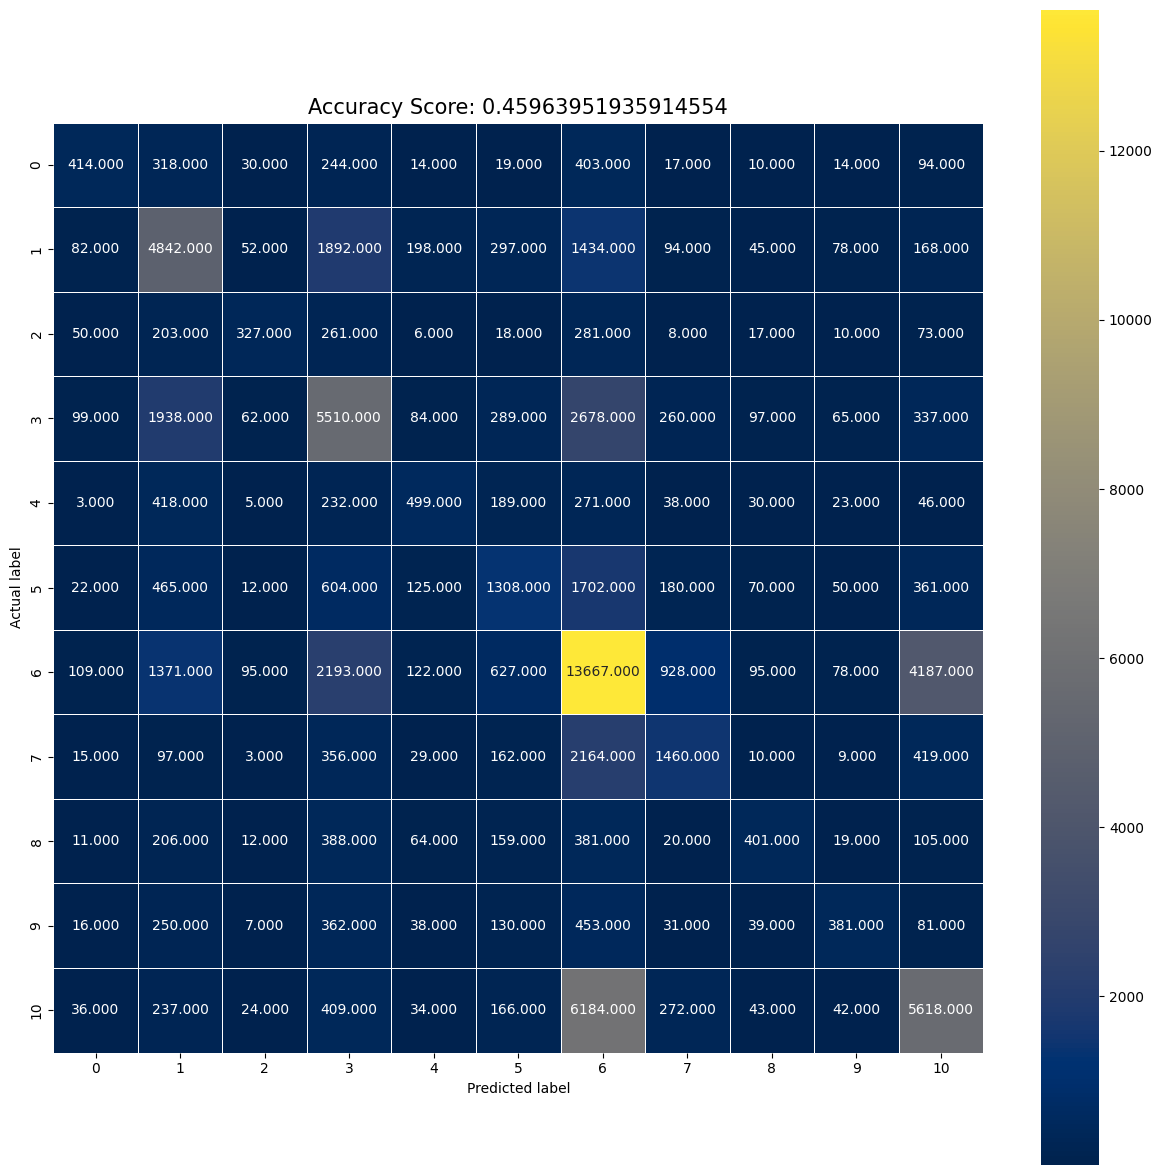

In [15]:
# display confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test_encoded, predictions)
plt.figure(figsize=(15, 15))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square=True, cmap='cividis')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.title('Accuracy Score: {0}'.format(accuracy), size=15)
plt.show()